In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import tree

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

# Decision Tree Regression - With single feature

In [ ]:
penguins = sns.load_dataset('penguins')
penguins.dropna(inplace=True)
X = penguins[['flipper_length_mm']]
y = penguins[['body_mass_g']]

In [ ]:
dtree = DecisionTreeRegressor(max_depth=3, random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=42)

In [5]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=100)

In [6]:
dtree.score(X_test,y_test)

0.7752517508173125

In [7]:
dtree.score(X_train,y_train)

0.7917879531353416

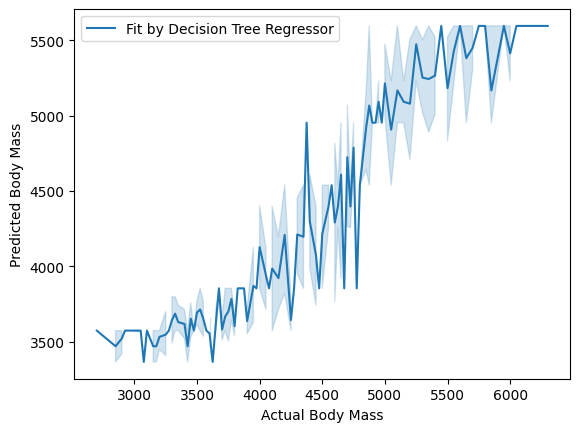

In [8]:
sns.lineplot(x=penguins['body_mass_g'], y=dtree.predict(X).reshape(-1),label='Fit by Decision Tree Regressor')
plt.xlabel('Actual Body Mass')
plt.ylabel('Predicted Body Mass');

Let's visualize this decision tree nodes
 \
https://mljar.com/blog/visualize-decision-tree/

In [9]:
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_0 <= 206.50
|   |--- feature_0 <= 193.50
|   |   |--- feature_0 <= 183.50
|   |   |   |--- value: [3366.07]
|   |   |--- feature_0 >  183.50
|   |   |   |--- value: [3573.91]
|   |--- feature_0 >  193.50
|   |   |--- feature_0 <= 202.50
|   |   |   |--- value: [3854.35]
|   |   |--- feature_0 >  202.50
|   |   |   |--- value: [4256.25]
|--- feature_0 >  206.50
|   |--- feature_0 <= 217.50
|   |   |--- feature_0 <= 212.50
|   |   |   |--- value: [4538.79]
|   |   |--- feature_0 >  212.50
|   |   |   |--- value: [4953.41]
|   |--- feature_0 >  217.50
|   |   |--- feature_0 <= 220.50
|   |   |   |--- value: [5230.77]
|   |   |--- feature_0 >  220.50
|   |   |   |--- value: [5595.45]



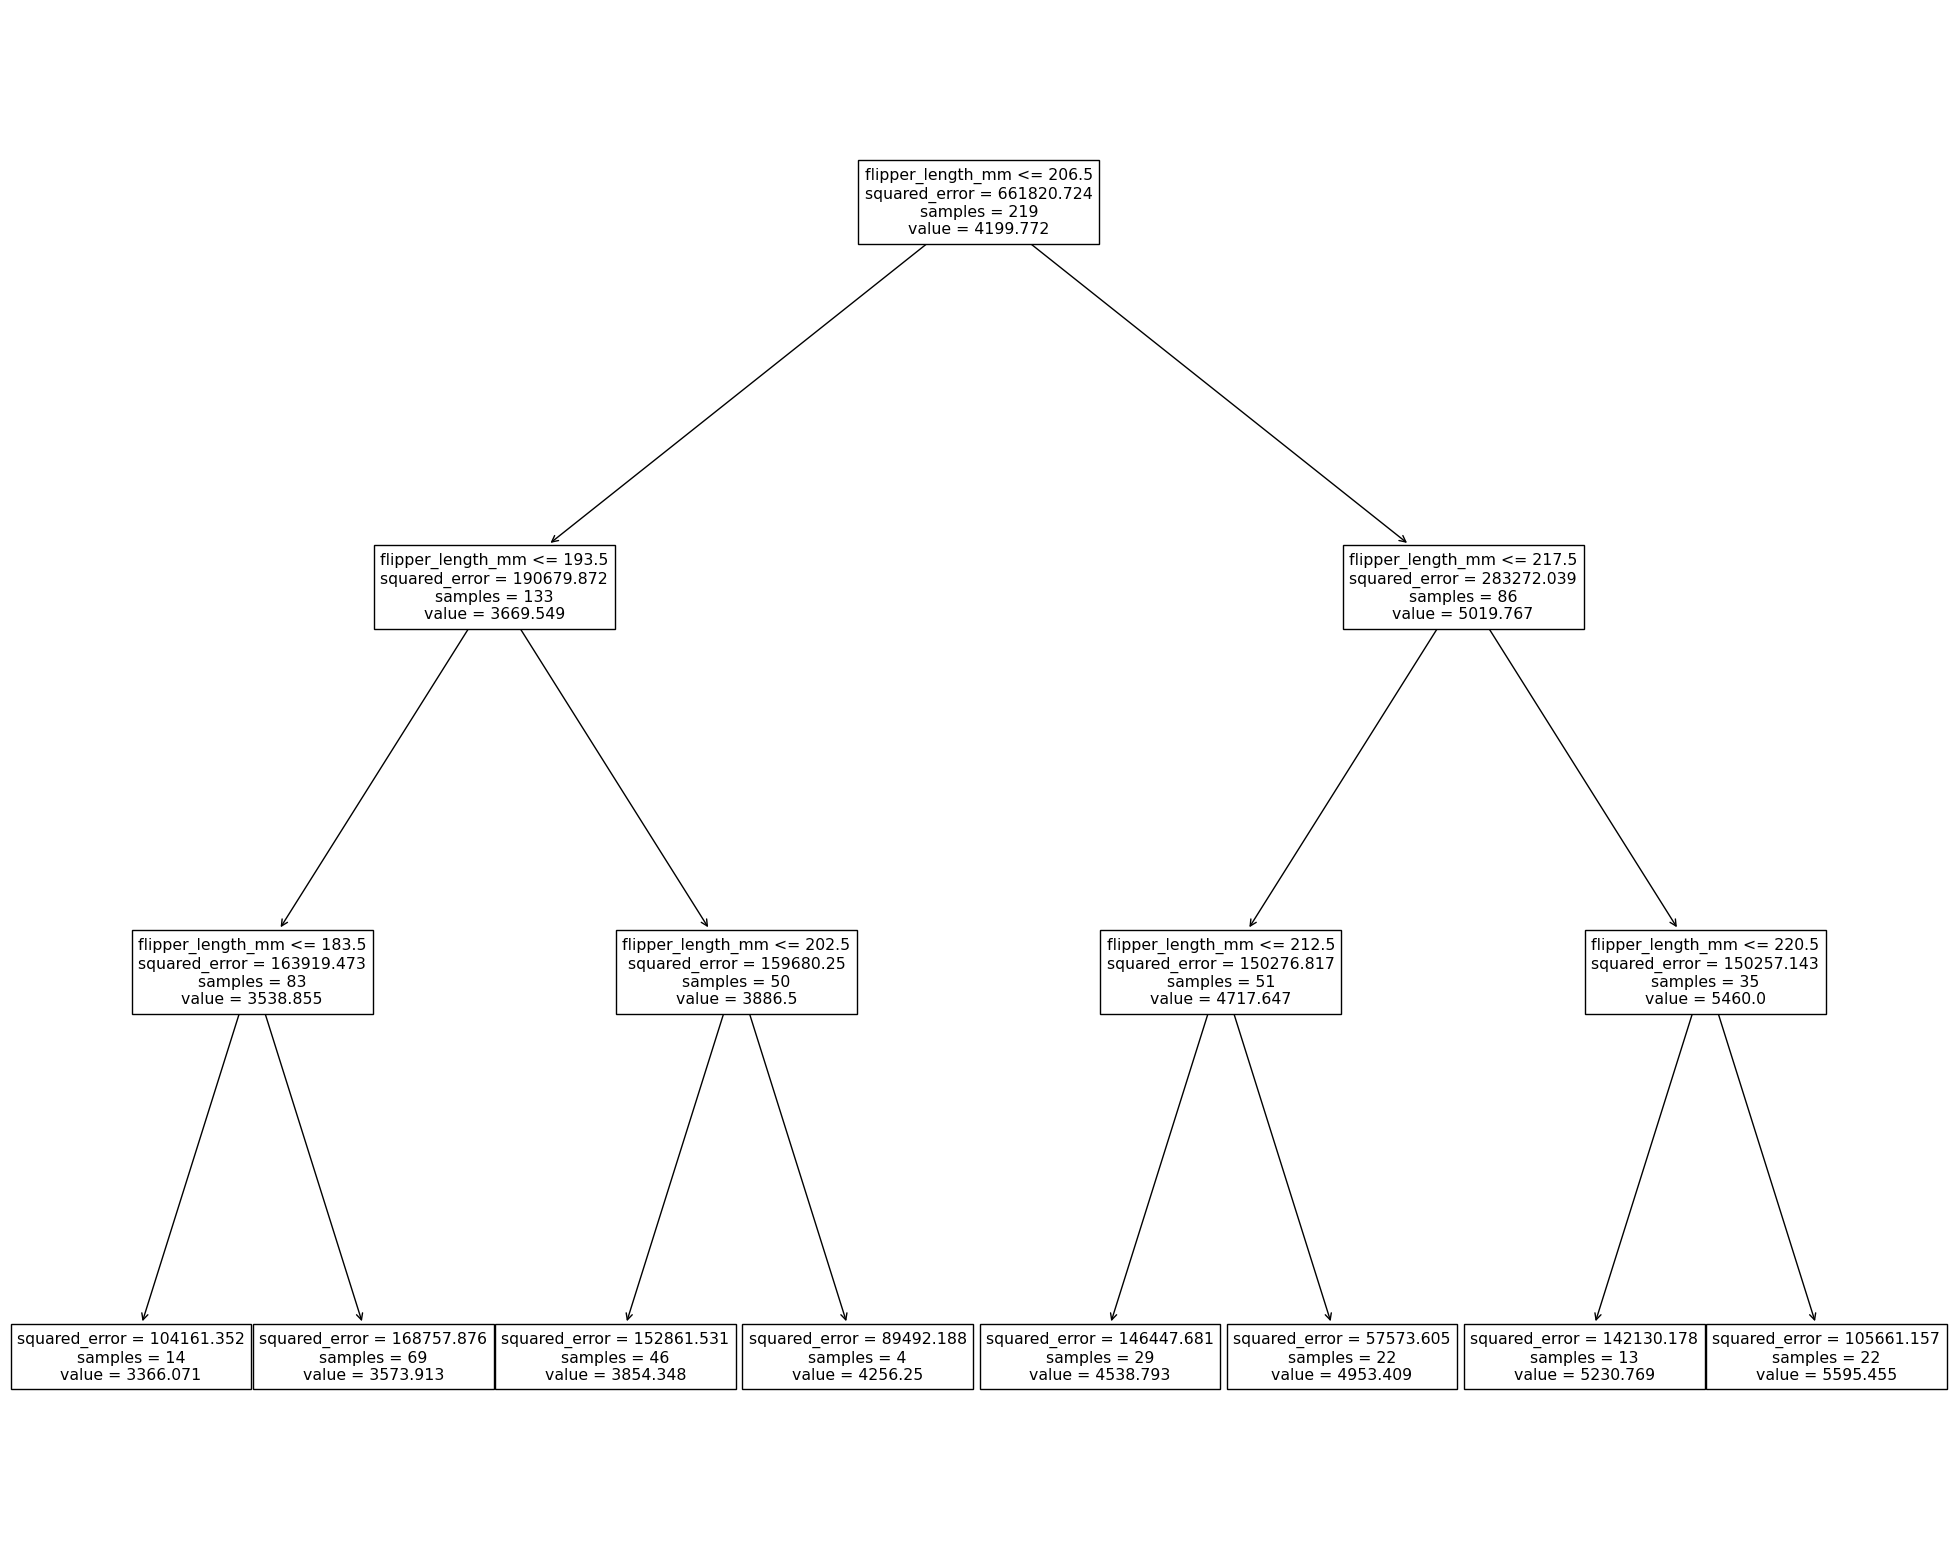

In [11]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dtree, feature_names=X.columns, filled=False);

# Random Forest Regression with single feature


In [15]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 42)
regressor.fit(X_train, y_train.values.reshape(-1))

RandomForestRegressor(n_estimators=10, random_state=42)

In [16]:
regressor.score(X_train, y_train.values.reshape(-1))

0.8223518284354366

In [17]:
regressor.score(X_test, y_test.values.reshape(-1))

0.7209027277570221

# Decision Tree Regression with multiple features

In [18]:
# Use the entire penguins dataset
data = pd.get_dummies(penguins, dtype=int, drop_first=True)

In [19]:
# Prepare the data
X_dt = data.drop(columns=['body_mass_g'])
y_dt = data.body_mass_g

X_traindt, X_testdt, y_traindt, y_testdt = train_test_split(X_dt,y_dt, test_size=0.3, random_state=42)

In [20]:
multi_dtree = DecisionTreeRegressor(max_depth=3, random_state=100)

In [21]:
multi_dtree.fit(X_traindt, y_traindt)

DecisionTreeRegressor(max_depth=3, random_state=100)

In [22]:
multi_dtree.score(X_testdt, y_testdt)

0.8459465553072522

In [23]:
multi_dtree.score(X_traindt, y_traindt)

0.874221403901364

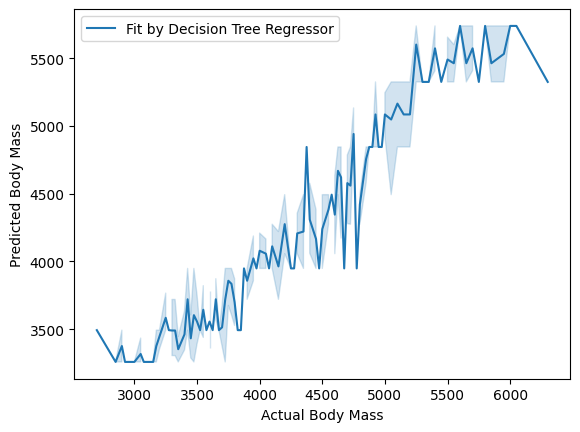

In [24]:
sns.lineplot(x=y_dt, y=multi_dtree.predict(X_dt),label='Fit by Decision Tree Regressor')
plt.xlabel('Actual Body Mass')
plt.ylabel('Predicted Body Mass');

In [25]:
text_representation = tree.export_text(multi_dtree)
print(text_representation)

|--- feature_4 <= 0.50
|   |--- feature_7 <= 0.50
|   |   |--- feature_0 <= 38.00
|   |   |   |--- value: [3258.33]
|   |   |--- feature_0 >  38.00
|   |   |   |--- value: [3492.93]
|   |--- feature_7 >  0.50
|   |   |--- feature_2 <= 202.50
|   |   |   |--- value: [3948.77]
|   |   |--- feature_2 >  202.50
|   |   |   |--- value: [4275.00]
|--- feature_4 >  0.50
|   |--- feature_7 <= 0.50
|   |   |--- feature_2 <= 211.50
|   |   |   |--- value: [4493.42]
|   |   |--- feature_2 >  211.50
|   |   |   |--- value: [4845.45]
|   |--- feature_7 >  0.50
|   |   |--- feature_1 <= 15.95
|   |   |   |--- value: [5325.83]
|   |   |--- feature_1 >  15.95
|   |   |   |--- value: [5739.29]



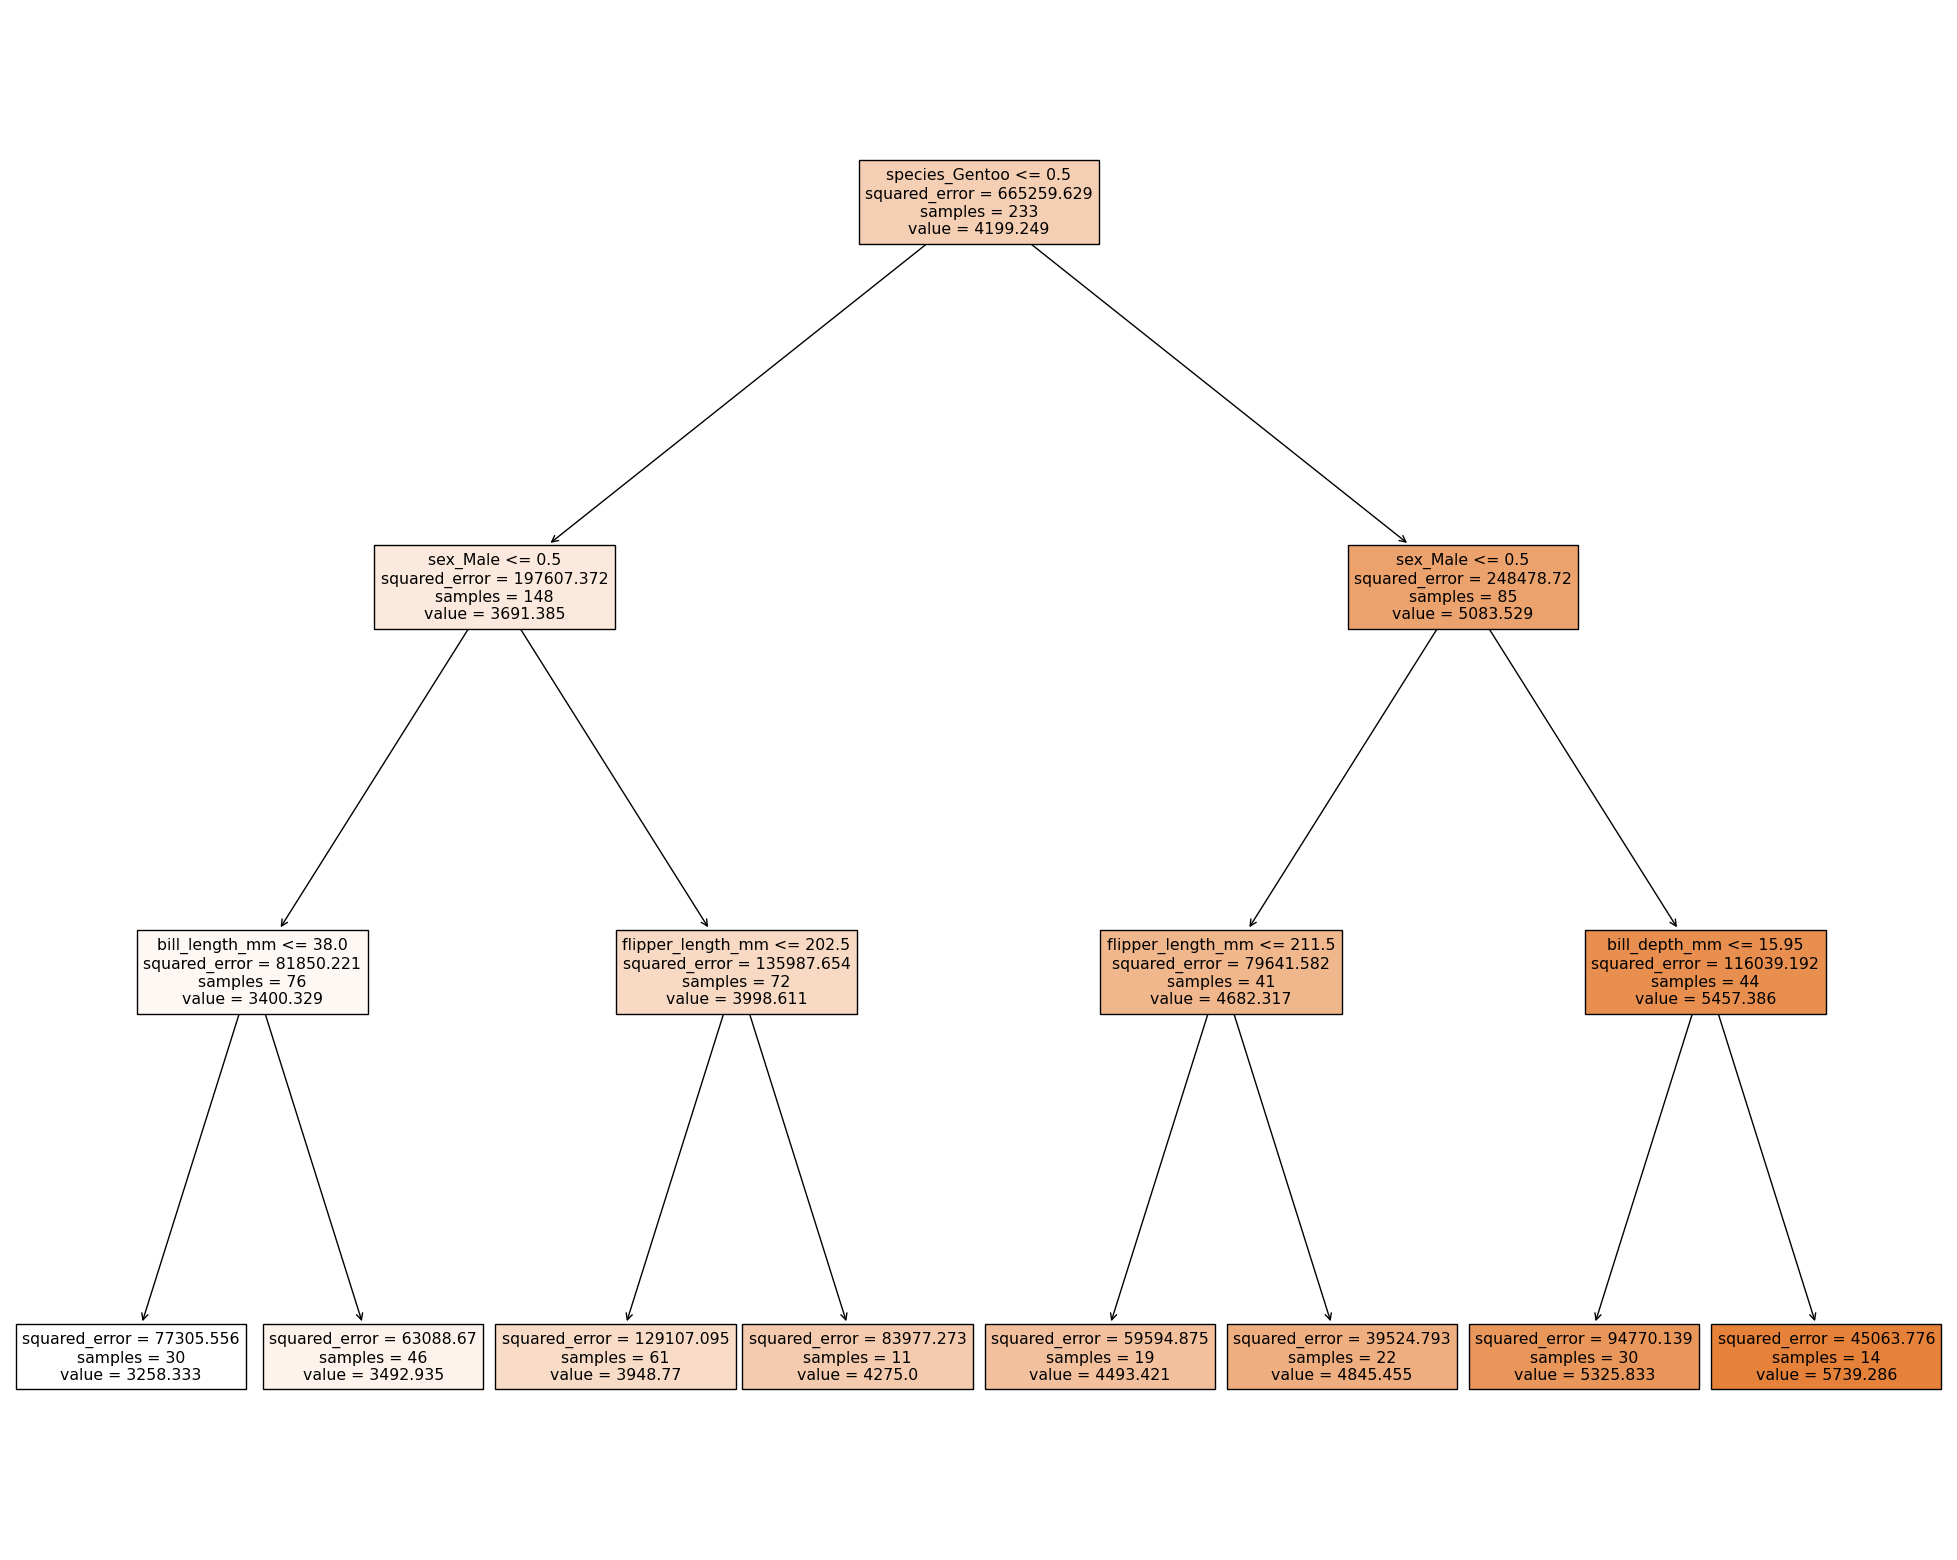

In [26]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(multi_dtree, feature_names=X_dt.columns, filled=True);